In [0]:
# %matplotlib inline
import numpy
import pandas            as pd
import matplotlib.pyplot as plt
import tensorflow        as tf
from   tensorflow                 import keras
from   tensorflow.keras           import layers
from   tensorflow.keras.callbacks import EarlyStopping
from   sklearn.preprocessing      import LabelEncoder, OneHotEncoder
from   sklearn.model_selection    import train_test_split
from   sklearn.ensemble           import ExtraTreesClassifier

In [0]:
# Upload dataset
from google.colab import files
uploaded = files.upload()

In [0]:
print("Versions:")
print("Tensorflow:", tf.VERSION)
# 1.14.0-rc1
print("Keras: ", tf.keras.__version__)
#2.2.4-tf

Versions:
Tensorflow: 1.14.0
Keras:  2.2.4-tf


In [0]:
# Load iris dataset
path = "./mushrooms.csv"
dataset = pd.read_csv(path)

In [0]:
dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [0]:
# Split dataset 
X = pd.DataFrame.copy(dataset)
y = X["class"]

del X["class"]

In [0]:
# Collect categorical values to make binary variables
categorical_columns = []
for i in X.columns.values:
    if(X[i].dtype == 'object'):
        categorical_columns.append(i)

In [0]:
# Function replace object typed columns with int64 typed columns by one hot encoding method
def one_hot_encoding(dataset, column_index, row_length):
  y = dataset.iloc[:, column_index].values
  le = LabelEncoder()
  y = le.fit_transform(y)
  y = pd.Series(y.reshape(row_length,))
  return y

In [0]:
#One Hot encoding input features
for k, feature in enumerate(X.columns.values):
    X[feature] = one_hot_encoding(X, k, len(X))

In [0]:
y = y.values

array(['p', 'e', 'e', ..., 'e', 'p', 'e'], dtype=object)

In [0]:
# One Hot encoding target variable
le = LabelEncoder()
y[:] = le.fit_transform(y[:])
y = pd.Series(y.reshape(len(y),))

In [0]:
y.head()

0    1
1    0
2    0
3    1
4    0
dtype: object

In [0]:
# Feature selection (feature importance)
print(X.shape)

model = ExtraTreesClassifier()
model.fit(X,y)

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh')
plt.show()

In [0]:
# Generate dummy variables and remove unnecessary columns
def generate_dummies(df, dummy_column):
    dummies = pd.get_dummies(df[dummy_column], prefix=dummy_column)
    df = pd.concat([df, dummies], axis=1)
    return df

for column in categorical_columns:
    X = generate_dummies(X, column)
    
for column in categorical_columns:
    del X[column]

In [0]:
X.head()

,cap-shape_0,cap-shape_1,cap-shape_2,cap-shape_3,cap-shape_4,cap-shape_5,cap-surface_0,cap-surface_1,cap-surface_2,cap-surface_3,cap-color_0,cap-color_1,cap-color_2,cap-color_3,cap-color_4,cap-color_5,cap-color_6,cap-color_7,cap-color_8,cap-color_9,bruises_0,bruises_1,odor_0,odor_1,odor_2,odor_3,odor_4,odor_5,odor_6,odor_7,odor_8,gill-attachment_0,gill-attachment_1,gill-spacing_0,gill-spacing_1,gill-size_0,gill-size_1,gill-color_0,gill-color_1,gill-color_2,...,stalk-color-below-ring_4,stalk-color-below-ring_5,stalk-color-below-ring_6,stalk-color-below-ring_7,stalk-color-below-ring_8,veil-type_0,veil-color_0,veil-color_1,veil-color_2,veil-color_3,ring-number_0,ring-number_1,ring-number_2,ring-type_0,ring-type_1,ring-type_2,ring-type_3,ring-type_4,spore-print-color_0,spore-print-color_1,spore-print-color_2,spore-print-color_3,spore-print-color_4,spore-print-color_5,spore-print-color_6,spore-print-color_7,spore-print-color_8,population_0,population_1,population_2,population_3,population_4,population_5,habitat_0,habitat_1,habitat_2,habitat_3,habitat_4,habitat_5,habitat_6
0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


In [0]:
dimension = X.shape[1]
NB_EPOCHS = 150  
BATCH_SIZE = dimension

In [0]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [0]:
# Ensure that fieldnames aren't included
X_train = X_train.values
y_train = y_train.values
X_test  = X_test.values
y_test  = y_test.values

In [0]:
# Create our model
model = tf.keras.Sequential()
model.add(layers.Dense(dimension+2, input_dim = dimension, activation='elu'))
model.add(layers.Dense(dimension+2, input_dim = dimension, activation='elu'))
model.add(layers.Dense(1,           input_dim = dimension, activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 119)               14042     
_________________________________________________________________
dense_7 (Dense)              (None, 119)               14280     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 120       
Total params: 28,442
Trainable params: 28,442
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Compile the model
model.compile(loss='binary_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [0]:
#set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=10)

# Train the model, store the results for plotting
print('Training...')
history = model.fit(X_train,
                    y_train,
                    validation_data = (X_test, y_test),
                    nb_epoch        = NB_EPOCHS,
                    batch_size      = BATCH_SIZE,
                    callbacks       = [early_stopping_monitor],
                    verbose         = 1)

W0712 22:00:59.380856 139989533951872 training.py:593] The `nb_epoch` argument in `fit` has been renamed `epochs`.


Training...
Train on 5686 samples, validate on 2438 samples
Epoch 1/150
5686/5686 [==============================] - 1s 109us/sample - loss: 0.1724 - acc: 0.9423 - val_loss: 0.0339 - val_acc: 0.9885
Epoch 2/150
5686/5686 [==============================] - 0s 31us/sample - loss: 0.0155 - acc: 0.9977 - val_loss: 0.0077 - val_acc: 0.9996
Epoch 3/150
5686/5686 [==============================] - 0s 34us/sample - loss: 0.0049 - acc: 0.9998 - val_loss: 0.0035 - val_acc: 1.0000
Epoch 4/150
5686/5686 [==============================] - 0s 31us/sample - loss: 0.0024 - acc: 1.0000 - val_loss: 0.0020 - val_acc: 1.0000
Epoch 5/150
5686/5686 [==============================] - 0s 32us/sample - loss: 0.0015 - acc: 1.0000 - val_loss: 0.0013 - val_acc: 1.0000
Epoch 6/150
5686/5686 [==============================] - 0s 31us/sample - loss: 9.2069e-04 - acc: 1.0000 - val_loss: 8.7323e-04 - val_acc: 1.0000
Epoch 7/150
5686/5686 [==============================] - 0s 34us/sample - loss: 6.3602e-04 - acc: 1.000

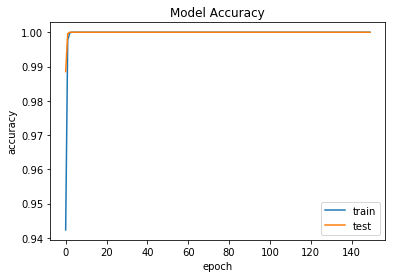

In [0]:
# Model accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

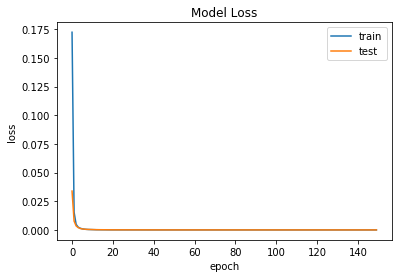

In [0]:
# Model Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [0]:
# evaluate the model
score = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

acc: 100.00%
